In [68]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


#for plotting not necessary
import matplotlib.pyplot as plt
%matplotlib inline


#logistic regression 
from sklearn.linear_model import LogisticRegression 

# Other classification models we might wanna use
#from sklearn.ensemble import RandomForestClassifier 
#from sklearn.svm import LinearSVC


In [69]:
#Create classifier

lr = LogisticRegression()

In [70]:
data = pd.read_csv('/kaggle/input/nbtadataset/NBTA-DATASET-NNEW.csv')
data.shape

(24999, 5)

In [71]:
from sklearn.utils import shuffle
data = shuffle(data)

In [72]:
data.describe()

,Soil Moisture,Humidity,Temperature,PH level
count,24999.000000,24999.000000,24998.000000,24997.000000
mean,53.361694,45.888532,24.204680,6.038725
std,25.406244,16.189886,5.671291,2.046140
min,0.000000,0.000000,1.000000,0.000000
25%,34.000000,35.000000,20.700000,4.000000
50%,52.000000,45.000000,23.900000,6.000000
75%,76.000000,56.000000,27.700000,8.000000
max,95.000000,88.000000,37.600000,14.000000


In [73]:
data.head()

,Soil Moisture,Humidity,Temperature,PH level,State
19231,11,54.0,18.8,3.0,Dehydrated
12211,74,62.0,30.6,8.0,Hydrated
6359,69,45.0,22.5,4.0,Hydrated
5542,60,45.0,26.4,6.0,Hydrated
24741,3,5.0,12.8,5.0,Dehydrated


In [74]:
#data.dropna()
new_data = data.fillna(value=0)

print(new_data)

#remove rows with any values that are not finite
#data_new = data[np.isfinite(data).all(1)]

#view updated DataFrame
#print(data_new)

       Soil Moisture  Humidity  Temperature  PH level       State
19231             11      54.0         18.8       3.0  Dehydrated
12211             74      62.0         30.6       8.0    Hydrated
6359              69      45.0         22.5       4.0    Hydrated
5542              60      45.0         26.4       6.0    Hydrated
24741              3       5.0         12.8       5.0  Dehydrated
...              ...       ...          ...       ...         ...
11080             78      42.0         31.1       8.0    Hydrated
5050              89      57.0         20.0       3.0    Hydrated
6573              95      33.0         19.3       8.0    Hydrated
6234              85      47.0         22.2       3.0    Hydrated
2232              70      48.0         18.8       7.0    Hydrated

[24999 rows x 5 columns]


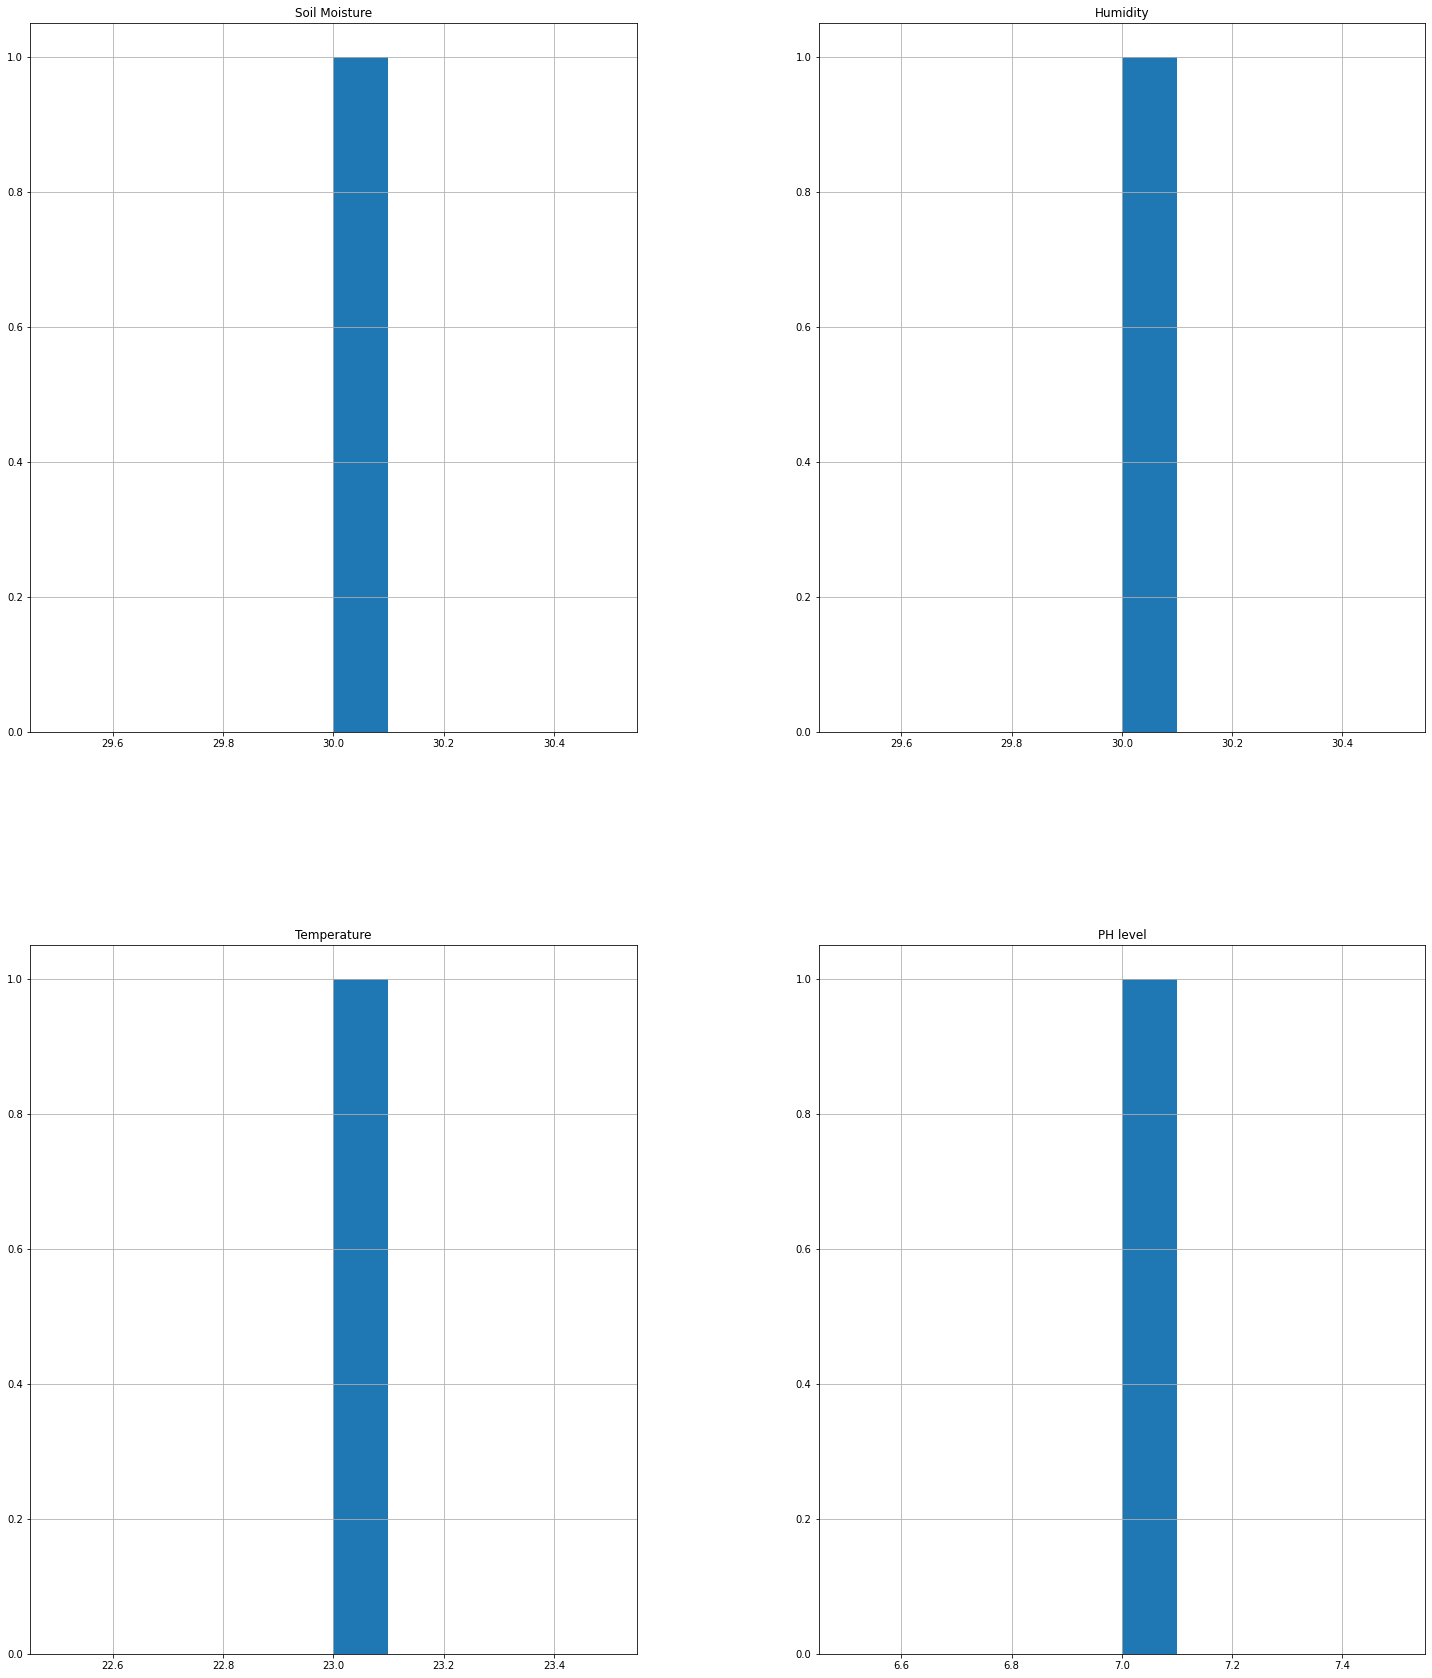

In [75]:
df.hist(figsize = (25,30))
plt.show()

In [76]:
data.tail()

,Soil Moisture,Humidity,Temperature,PH level,State
11080,78,42.0,31.1,8.0,Hydrated
5050,89,57.0,20.0,3.0,Hydrated
6573,95,33.0,19.3,8.0,Hydrated
6234,85,47.0,22.2,3.0,Hydrated
2232,70,48.0,18.8,7.0,Hydrated


In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24999 entries, 19231 to 2232
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Soil Moisture  24999 non-null  int64  
 1   Humidity       24999 non-null  float64
 2   Temperature    24998 non-null  float64
 3   PH level       24997 non-null  float64
 4   State          24999 non-null  object 
dtypes: float64(3), int64(1), object(1)
memory usage: 1.1+ MB


In [78]:
#Check range again
X = new_data.iloc[:,:4]
y = new_data.iloc[:,4]

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,  random_state = 0)
#maybe add random state = 10



In [80]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(19999, 4)
(5000, 4)
(19999,)
(5000,)


In [81]:
lr.fit(X_train, y_train)

LogisticRegression()

In [82]:
lr.predict(X_test)

array(['Dehydrated', 'Hydrated', 'Dehydrated', ..., 'Hydrated',
       'Hydrated', 'Hydrated'], dtype=object)

In [83]:
from sklearn.metrics import confusion_matrix

In [84]:
confusion_matrix(lr.predict(X_train), y_train)

array([[9535,  633],
       [ 499, 9332]])

In [85]:
# Another way to measure accuracy score
#compare testing and score to actual data in the training
from sklearn.metrics import accuracy_score
predictions = lr.predict(X_test)
score = accuracy_score(y_test, predictions)
score
#if the accuracy score drops and changes dramatically at every run, you may need more data

0.9444

In [86]:
confusion_matrix(lr.predict (X_test), y_test)

array([[2407,  154],
       [ 124, 2315]])

In [87]:
y_test

21099    Dehydrated
12695      Hydrated
18915    Dehydrated
24861    Dehydrated
3062       Hydrated
            ...    
2294       Hydrated
20582    Dehydrated
3811       Hydrated
8471       Hydrated
6643       Hydrated
Name: State, Length: 5000, dtype: object

In [88]:
predictions

array(['Dehydrated', 'Hydrated', 'Dehydrated', ..., 'Hydrated',
       'Hydrated', 'Hydrated'], dtype=object)

In [89]:
from mlxtend.plotting import plot_learning_curves

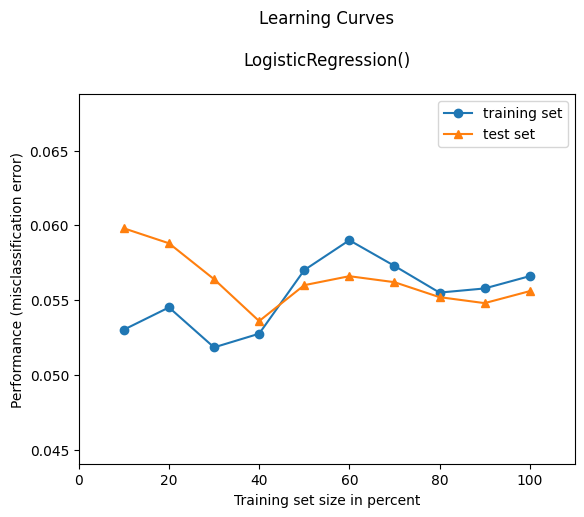

In [90]:
plot_learning_curves(X_train, y_train, X_test, y_test, lr)
plt.show()

In [91]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(lr.score(X_test, y_test)))
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))  

Accuracy of logistic regression classifier on test set: 0.94
              precision    recall  f1-score   support

  Dehydrated       0.94      0.95      0.95      2531
    Hydrated       0.95      0.94      0.94      2469

    accuracy                           0.94      5000
   macro avg       0.94      0.94      0.94      5000
weighted avg       0.94      0.94      0.94      5000



In [92]:
from sklearn import metrics
print('Training Accuracy : ',
      metrics.accuracy_score(
          y_train, lr.predict(X_train))*100)
 
print('Testing Accuracy : ', metrics.accuracy_score(
    y_test, lr.predict(X_test))*100)

Training Accuracy :  94.3397169858493
Testing Accuracy :  94.44
